# Домашнее задание 2

Используя датасет [STUDENT ALCOHOL CONSUMPTION](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и статью "USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION" выполните следующие задания:

### Предобработка (Max 2)
- Приведите описание признаков датасета на русском языке с указанием типа данных (0.3 балла)
- Предобработка данных (1.7)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (0.4)
    - Подсчитайте количество людей, у которых матери с образованием "0" (0.4)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (0.4)
    - Используя объект [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) с параметром [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)  выберите два признака, которые наиболее сильно связаны с признаком G3 (0.5)

# Описание переменных
    sex пол студента (бинарная: female или male)
    age возраст студента (численная: от 15 до 22)
    school школа студента (бинарная: Gabriel Pereira или Mousinho da Silveira)
    address тип места проживания студента (бинарная: urban или rural)
    Pstatus родители живут вместе или нет (бинарная: living together or apart)
    Medu образование матери (численная: от 0 до 4a)
    Mjob профессия мамы (mother’s job (номинальная: close to home, school reputation, course preference или other)
    traveltime сколько времени занимает дорога в школу (численная: 1-< 15 мин., 2-15 до 30 мин., 3-30 мин. до 1 часов или 4 -> 1 часов).
    studytime сколько времени тратит на учебу в неделю (численная: 1-< 2 часов, 2- 2 до 5 часов, 3-5 до 10 часов or 4 -> 10 часов)
    failures количество незачетов (численная: n if 1 ≤ n < 3, else 4)
    schoolsup школьное доп. образование (бинарная: yes или no)
    famsup помощь с образованием от семьи (бинарная: yes или no)
    activities внеучебная деятельность (бинарная: yes или no)
    paidclass платные образовательные услуги (бинарная: yes или no)
    internet доступ к интернету дома (бинарная: yes или no)
    nursery ходил в детский сад (бинарная: yes или no)
    higher желание получить высшее образование (бинарная: yes или no)
    romantic наличие романтических отношений (бинарная: yes или no)
    freetime количество свободного времени (численная: от 1- очень редко до 5- очень часто)
    goout частота прогулок с друзьями (численная: от 1- очень редко до 5- очень часто)
    health состояние здоровья (численная: от 1- очень плохо до 5- очень хорошо)
    absences количество пропусков в школе (численная: от 0 до 93)
    G1 оценка за первый семестр (численная: от 0 до 20)
    G2 оценка за второй семестр (численная: от 0 до 20)
    G3 итоговая оценка (численная: от 0 до 20)
    alc потребление алкоголя в неделю (численная: от 1- очень редко до 5- очень часто)

In [30]:
import pandas as pnd
import numpy as np

mat = pnd.read_csv("student-mat.csv", sep = ';')

In [31]:
data = mat
data.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [32]:
data.isnull().values.any() # пропущенных значений не найдено

False

In [33]:
len(data.loc[data['Medu'] == 0]) # 9 студентов

3

In [34]:
data = pnd.get_dummies(data)
data.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_all = data.drop('G3', 1)
y = data.G3.values

X_new = SelectKBest(f_regression, k = 2).fit_transform(X_all, y)

### Регрессия (Max 4)
Выберите один признак, который наиболее влияет на признак G3 и используя кросс-валидацию (cross-validation) выполните следующее:

- На обучающей выборке обучите объект [RidgeСV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty (0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте зависимость R2 oт n_estimators на графике (0.2)
- Max (0.5)
- -----------------------------------
- Используя все доступные регрессоры в библиотеке sklearn, найдите самый лучший регрессор. (2.5)

In [56]:
from sklearn.cross_validation import train_test_split

X = SelectKBest(f_regression, k = 1).fit_transform(X_all, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 130, test_size = 0.2)

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV

alphas = [10**(-i) for i in range(-2, 15)]

ridge_r = RidgeCV(cv = 4, alphas = alphas)
ridge_r.fit(X_train, y_train)
print('Лучшая альфа = {0}'.format(ridge_r.alpha_))

ridge_mae = mean_absolute_error(y_test, ridge_r.predict(X_test))
ridge_mse = mean_squared_error(y_test, ridge_r.predict(X_test))
ridge_mdae = median_absolute_error(y_test, ridge_r.predict(X_test))
ridge_rsq = r2_score(y_test, ridge_r.predict(X_test))

print("""
Результаты для гребневой регрессии, alpha = {0}:
MAE = {1},
MSE = {2},
MDAE = {3},
r2 = {4})""".format(ridge_r.alpha_, ridge_mae, ridge_mse, ridge_mdae, ridge_rsq))

Лучшая альфа = 1e-12

Результаты для гребневой регрессии, alpha = 1e-12:
MAE = 1.319574855388964,
MSE = 4.7786694026031995,
MDAE = 0.8484481143346958,
r2 = 0.8217886122399368)


In [76]:
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import KFold

sgd_r2, sgd_rt = [], []

KF = KFold(n = len(X), n_folds = 4, shuffle = True, random_state = 170)

for p in ['None', 'l2', 'l1', 'elasticnet']:    
    sgd = SGDRegressor(penalty = p)
    for train_index, test_index in KF:      
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        sgd.fit(X_train, y_train)
        prediction = sgd.predict(X_test)
        sgd_rt.append(r2_score(y_test, prediction))
    sgd_r2.append(np.mean(sgd_rt))
    sgd_rt = []
    
print("""
Результаты для стохастического градиента:
penalty = None, r2 = {0},
penalty = l1, r2 = {1},
penalty = l2, r2 = {2},
penalty = elasticnet, r2 = {3}""".format(sgd_r2[0], sgd_r2[1], sgd_r2[2], sgd_r2[3]))


Результаты для стохастического градиента:
penalty = None, r2 = 0.8002553202413204,
penalty = l1, r2 = 0.7978040488364344,
penalty = l2, r2 = 0.8100567933191534,
penalty = elasticnet, r2 = 0.803766520386379


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
estimators = range(100, 1100, 100)
depths = [1, 3, 10]

gbr_temp = []
temp = []
gbr_r2 = []

for d in depths:
    for e in estimators:
        gbr = GradientBoostingRegressor(max_depth = d, n_estimators = e)
        for train_index, test_index in KF:      
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]       
            gbr.fit(X_train, y_train)
            temp.append(r2_score(y_test, gbr.predict(X_test)))            
        gbr_temp.append(np.mean(temp))
        temp = []       
    gbr_r2.append(gbr_temp)
    gbr_temp = []

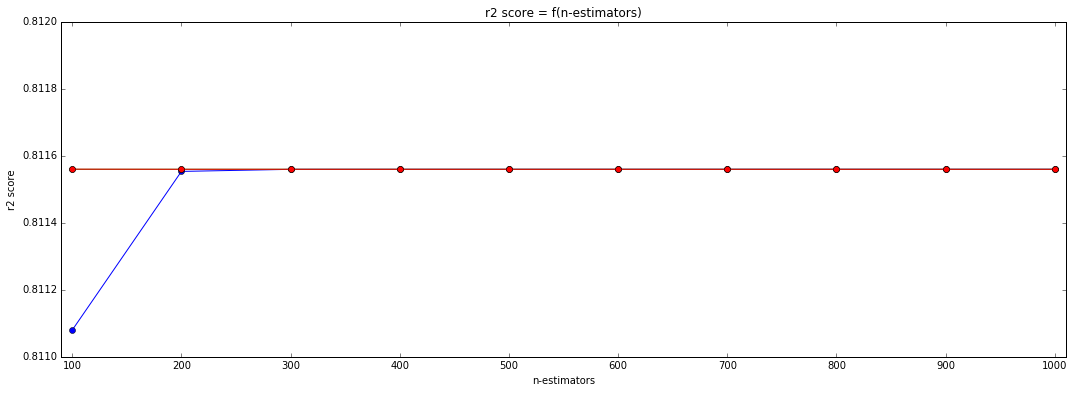

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=[18, 6])

for i in range(3):
    plt.plot(estimators, gbr_r2[i], '-o')
    
plt.xlabel('n-estimators')
plt.ylabel('r2 score')
plt.xlim([90, 1010])
plt.xticks(estimators)
plt.ylim([0.811, 0.812])
plt.title('r2 score = f(n-estimators)')

ps: тут три линии, просто две кривые слились на графике

In [86]:
from sklearn.ensemble import ExtraTreesRegressor

etr_rt, etr_r2 = [], []

for e in estimators:    
    etr = ExtraTreesRegressor(n_estimators = e)
    for train_index, test_index in KF:      
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        etr.fit(X_train, y_train)
        prediction = etr.predict(X_test)
        etr_rt.append(r2_score(y_test, prediction))
    etr_r2.append(np.mean(etr_rt))
    etr_rt = []

In [87]:
print('Лучший r2 = {0}, n_estimators = {1}'.format(max(etr_r2), estimators[np.argmax(etr_r2)]))

Лучший r2 = 0.8120172127430447, n_estimators = 800


In [90]:
from sklearn.neural_network import MLPRegressor

mlp_rt, mlp_r2 = [], []

for e in estimators:    
    mlp = MLPRegressor(max_iter = 1500, hidden_layer_sizes = e)
    for train_index, test_index in KF:      
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        mlp.fit(X_train, y_train)
        prediction = mlp.predict(X_test)
        mlp_rt.append(r2_score(y_test, prediction))
    mlp_r2.append(np.mean(mlp_rt))
    mlp_rt = []

In [91]:
print('Лучший r2 = {0}, hidden_layer_sizes = {1}'.format(max(mlp_r2), estimators[np.argmax(mlp_r2)]))

Лучший r2 = 0.8204318824822155, hidden_layer_sizes = 200


In [92]:
from sklearn.ensemble import RandomForestRegressor

rf_rt, rf_r2 = [], []

for e in estimators:    
    rf = RandomForestRegressor(n_estimators = e)
    for train_index, test_index in KF:      
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rf.fit(X_train, y_train)
        prediction = rf.predict(X_test)
        rf_rt.append(r2_score(y_test, prediction))
    rf_r2.append(np.mean(rf_rt))
    rf_rt = []

In [93]:
print('Лучший r2 = {0}, n_estimators = {1}'.format(max(rf_r2), estimators[np.argmax(rf_r2)]))

Лучший r2 = 0.8121335430877802, n_estimators = 500


In [94]:
print('Лучший регрессор: RidgeCV, Лучшая альфа = 1e-12, r2 = 0.8217886122399368)')

Лучший регрессор: RidgeCV, Лучшая альфа = 1e-12, r2 = 0.8217886122399368)


### Классификация (Max 4)
- В статье описано использование Random Forest для предсказания важности факторов, влияющих на потребление алкоголя. Повторите эксперимент с использование объекта [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Обучите объект [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)  и найдите для него наилучшие параметры. Укажите accuracy для наилучших параметров (0.5)
- Найдите наилучший классификатор. Укажите accuracy для наилучших параметров (2.5)

In [13]:
Alc = (data.Walc*2 + data.Dalc*5)/7,
new_data = data.drop(['Walc', 'Dalc'], 1)
new_data
Alc = pnd.DataFrame(np.column_stack([Alc[0]]), columns = (['Alc']))
Alc.Alc = Alc.Alc.apply(lambda x: 0 if x < 3 else 1)
Alc = np.asarray(Alc)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

X = new_data.values
y = Alc

X = X.reshape(len(X), -1)
y = y.reshape(len(y), )

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.2)

In [15]:
rfc = RandomForestClassifier()
param_grid = { "n_estimators" : [100, 250, 500, 750, 1000],
               "criterion" : ["gini", "entropy"],
               "bootstrap": [True, False] }

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, scoring = 'accuracy')
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True, False], 'n_estimators': [100, 250, 500, 750, 1000], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [16]:
from sklearn.metrics import accuracy_score

print(CV_rfc.best_estimator_)
predict = CV_rfc.predict(X_test)

print('Accuracy на тесте', accuracy_score(y_test, predict))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Accuracy на тесте 0.886075949367


In [17]:
from sklearn.ensemble import AdaBoostClassifier
ac = AdaBoostClassifier()

param_grid = { "n_estimators" : [100, 250, 500, 750, 1000],
               "algorithm" : ["SAMME", "SAMME.R"] }

CV_ac = GridSearchCV(estimator = ac, param_grid = param_grid, cv = 5, scoring = 'accuracy')
CV_ac.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 250, 500, 750, 1000], 'algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [18]:
print(CV_ac.best_estimator_)
predict = CV_ac.predict(X_test)

print('Accuracy на тесте', accuracy_score(y_test, predict))

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=250, random_state=None)
Accuracy на тесте 0.848101265823


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

param_grid = { "n_estimators" : [100, 250, 500, 750, 1000],
               "max_depth" : [3, 6]}

CV_gbc = GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 5, scoring = 'accuracy')
CV_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 6], 'n_estimators': [100, 250, 500, 750, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [20]:
print(CV_gbc.best_estimator_)
predict = CV_gbc.predict(X_test)

print('Accuracy на тесте', accuracy_score(y_test, predict))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Accuracy на тесте 0.860759493671


In [26]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

param_grid = { "loss" : ['hinge', 'log', 'huber'],
               "penalty" : ['None', 'l2', 'l1', 'elasticnet'],
               "alpha" : [10**(-i) for i in range(-2, 5)] }

CV_sgdc = GridSearchCV(estimator = sgdc, param_grid = param_grid, cv = 5, scoring = 'accuracy')
CV_sgdc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['None', 'l2', 'l1', 'elasticnet'], 'loss': ['hinge', 'log', 'huber'], 'alpha': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [27]:
print(CV_sgdc.best_estimator_)
predict = CV_sgdc.predict(X_test)

print('Accuracy на тесте', accuracy_score(y_test, predict))

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
Accuracy на тесте 0.873417721519


In [29]:
print('RandomForestClassifier дал лучший Accuracy на тесте = 0.886075949367')

RandomForestClassifier дал лучший Accuracy на тесте = 0.886075949367


# Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1